<h1 style="color:blue; font-size:40px;"><strong><em>Revenue Management of Superstore Sales Data</em></strong></h1>
[Data Source](https://www.kaggle.com/code/adityadangwal011/superstore-sales-data-analysis)

<h2 style="color:blue; font-size:30px;"><strong><em>Extensive list of Libraries for Data Analysis (EDA). Few will be used. Others are learning purpose</em></strong></h2>

In [1326]:
# Data Importing and mauplation
import pandas as pd # 	Data manipulation (CSV, Excel, SQL, JSON, etc.)cCSV, Excel, SQL, JSON, Parquet, etc.Contains visualization as well. 
import numpy as np #Numerical data manipulation. Arrays, matrices
!pip install openpyxl
import openpyxl # Excel file manipulation (XLSX). Excel files (XLSX)
!pip install xlrd xlwt
import xlrd #Excel file manipulation (XLS format).Excel files (XLS)
!pip install pyodbc
import pyodbc #SQL database interaction. SQL databases (MySQL, SQL Server, etc.)
!pip install sqlalchemy
from sqlalchemy import create_engine #SQL database interaction (ORM). SQL databases
import csv # Reading and writing CSV files. CSV files
!pip install requests
import requests #Fetch data from APIs or websites. JSON, XML, HTML
!pip install dask
import dask.dataframe as dd #Parallel computing for large data. CSV, Parquet, HDF5, etc.
!pip install beautifulsoup4
from bs4 import BeautifulSoup #Web scraping (HTML/XML).HTML, XML
import requests # Fetch data from APIs or websites. JSON, XML, HTML
!pip install petl
import petl as etl #ETL (Extract, Transform, Load). CSV, Excel, JSON, SQL
#Visualization 
import matplotlib.pyplot as plt #Basic plots and charts
import seaborn as sns #Statistical graphics
import plotly.express as px #Interactive visualizations

<h3 style="color:blue; font-size:25px;"><strong><em>Load Data file and "Know the data"</em></strong></h3>

In [1328]:
df = pd.read_csv(r'cap_data\ss_data.csv')
# df = pd.read_excel('file.xlsx')
# df = pd.read_json('file.json')
# import sqlite3 #Reading from a Database (SQL)
# #Connect to the SQLite database
# conn = sqlite3.connect('database.db') #For reading from SQLite databases.
# # Query data into a DataFrame
# df = pd.read_sql_query("SELECT * FROM table_name", conn)
#  #For reading JSON data into a Python object.
#  #For reading text files and processing line-by-line.open()json.load()

In [1329]:
df.head(2)
df.tail(2)
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9661,9662,CA-2017-160717,06/06/2017,11/06/2017,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Santa Barbara,California,93101.0,West,TEC-AC-10002134,Technology,Accessories,Rosewill 107 Normal Keys USB Wired Standard Ke...,26.96


In [1330]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [1331]:
df['Customer Name'].value_counts()

Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: count, Length: 793, dtype: int64

In [1332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

<h4 style="color:blue; font-size:20px;"><strong><em>Fix or Convert Data types</em></strong></h4>

In [1334]:
df['Order Date'] =pd.to_datetime(df['Order Date'], errors ='coerce')
df['Ship Date'] =pd.to_datetime(df['Ship Date'], errors ='coerce')
#df[['Ship Mode','Customer Name','Segment','Country','City','State','Region','Product ID','Category','Sub-Category','Product Name']] = df[['Ship Mode','Customer Name','Segment','Country','City','State','Region','Product ID','Category','Sub-Category','Product Name']].astype('category')
object_cols =df.select_dtypes(include ='object').columns
df[object_cols] =df[object_cols].astype('category')

In [1335]:
df.dtypes

Row ID                    int64
Order ID               category
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID            category
Customer Name          category
Segment                category
Country                category
City                   category
State                  category
Postal Code             float64
Region                 category
Product ID             category
Category               category
Sub-Category           category
Product Name           category
Sales                   float64
dtype: object

<h4 style="color:blue; font-size:20px;"><strong><em>Identify Duplicate Rows and Columns and Remove them </em></strong></h4>

In [1337]:
df.duplicated().any()

False

<h4 style="color:blue; font-size:20px;"><strong><em>Convert text to lower case, strip leading and trailing spaces, Remove Special Characters</em></strong></h4>

In [1339]:
df = df.apply(lambda x: x.str.lower().str.strip().str.replace(r'[^a-zA-Z0-9\s]', '', regex=True) if x.dtype == "category" else x)


In [1340]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2120,2121,us2018168690,2018-07-01,NaT,standard class,ts21085,thais sissman,consumer,united states,ormond beach,florida,32174.0,south,offbi10000145,office supplies,binders,zipper ring binder pockets,2.808


<h4 style="color:blue; font-size:20px;"><strong><em>Handling missing values. Dropped rows (9) with NaN as seen in the 'Postal Code'column</em></strong></h4>

In [1342]:
df.isnull()
df[df.isnull().any(axis=1)] #locate rows with any null values
# df.loc[:,df.isnull().any()] #locate columns with any null values 
# df = df.drop['Postal Code',axis =1] #drop the entire column
df = df.dropna(subset =['Postal Code']) # drops rows where postal code is NaN

In [1343]:
df.shape[0] # len(df)
df.shape[1] #len(df.columns)
df.shape

(9789, 18)

<h4 style="color:blue; font-size:20px;"><strong><em>Identify Outliers using Z score, IQR, Box Plot and Scatter Plot. Remove outliers/use averages</em></strong</em></strong></h4>

In [1345]:
#zscore: Shows 123 rows as outliers 
from scipy.stats import zscore
z_score = zscore(df['Sales'])
outliers = df[abs(z_score)>3]
outliers.shape


(122, 18)

In [1346]:
#Interquartile Range. Outliers are data points that fall below Q1- 1.5*IQR or above Q3+1.5*IQR. Shows 1145 rows as outliers. 
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3-Q1
Outliers_IQR = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]
Outliers_IQR.shape

(1141, 18)

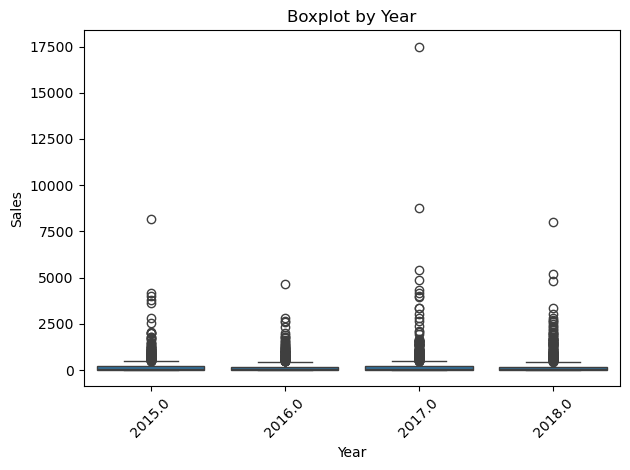

In [1347]:
#BoxPlot
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
sns.boxplot(x='Year', y='Sales', data=df)
plt.title('Boxplot by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


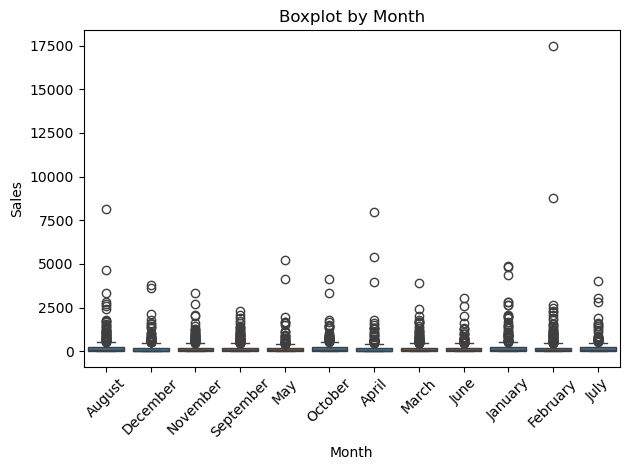

In [1348]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.month_name()
sns.boxplot(x='Month', y='Sales', data=df)

plt.xticks(rotation=45)
plt.title('Boxplot by Month')
plt.tight_layout()
plt.show()


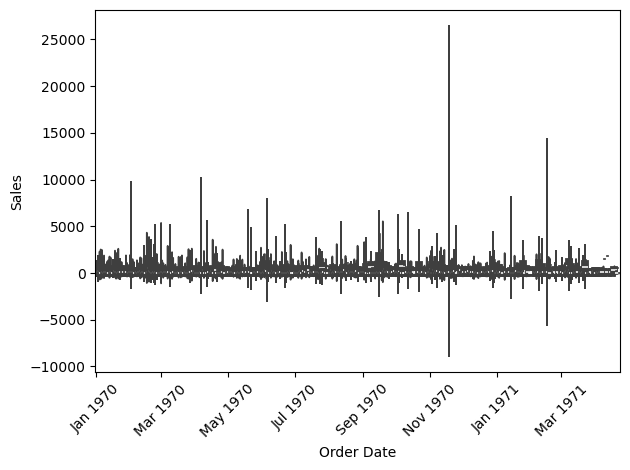

In [1349]:
# BoxPlot: Group data by 4 months using actual dates 
df['4-Month Period'] = pd.to_datetime(df['Order Date']).dt.to_period('4M')
import matplotlib.dates as mdates
ax = sns.violinplot(x='Order Date', y='Sales', data=df)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Every 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



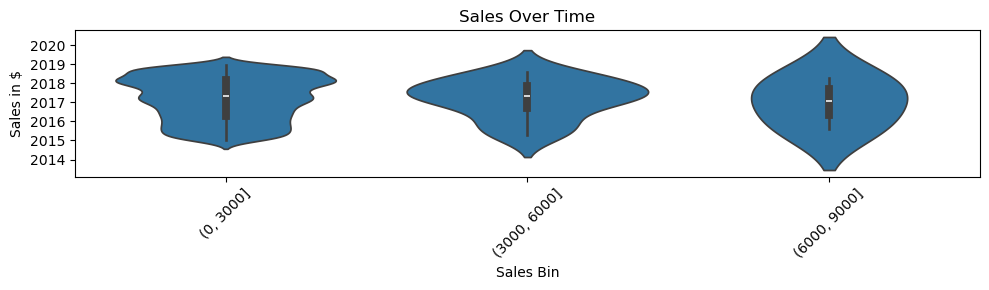

In [1350]:
#Voilin Plot as data is very dense. Used binning as well
plt.figure(figsize=(10,3))
df['Sales Bin'] = pd.cut(df['Sales'], bins=range(0, 10000, 3000))
sns.violinplot(x='Sales Bin', y='Order Date', data=df)
# sns.boxplot(x=df['Sales'])
plt.xticks(rotation=45)
df['Sales Bin'] = pd.cut(df['Sales'], bins=range(0,2150,500))
plt.ylabel('Sales in $')
plt.title('Sales Over Time')
plt.tight_layout()



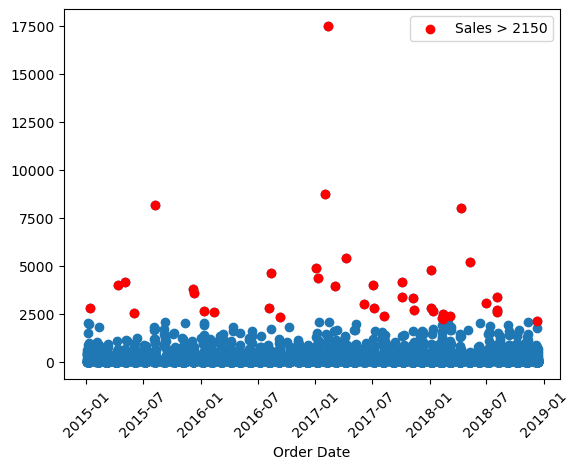

In [1351]:
# Select data above threshold
above_threshold = df[df['Sales'] > 2150]

# Scatter Plot
plt.scatter(df['Order Date'], df['Sales'])
plt.scatter(above_threshold['Order Date'], above_threshold['Sales'], color='red', label='Sales > 2150')
plt.xlabel('Order Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()


<h4 style="color:blue; font-size:20px;"><strong><em>Based on Z score removed rows (123)</em></strong</em></strong></h4>

In [1353]:
df_cleaned = df.drop(outliers.index)
df_cleaned.shape

(9667, 22)

<h4 style="color:blue; font-size:20px;"><strong><em>Feature Engineering to extract and transform the 'Sales' column</em></strong</em></strong></h4>

In [1355]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
numeric_cols = ['Sales']
df_numeric = df_cleaned[numeric_cols].dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled

array([[ 0.26429912],
       [ 1.80321144],
       [-0.54559614],
       ...,
       [ 0.17663632],
       [-0.50710205],
       [-0.55946659]])

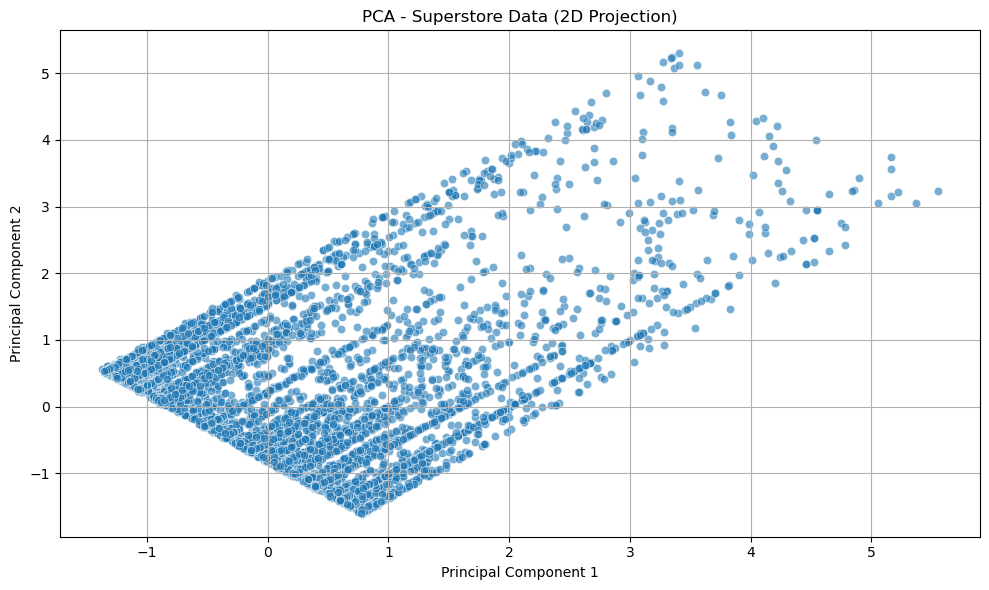

In [1356]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
numeric_cols = ['Sales','Postal Code']
df_numeric = df_cleaned[numeric_cols].dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

pca = PCA(n_components=2)  # You can choose more if needed
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', alpha=0.6)
plt.title('PCA - Superstore Data (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()



<h4 style="color:blue; font-size:20px;"><strong><em>Visualizations</em></strong</em></strong></h4>

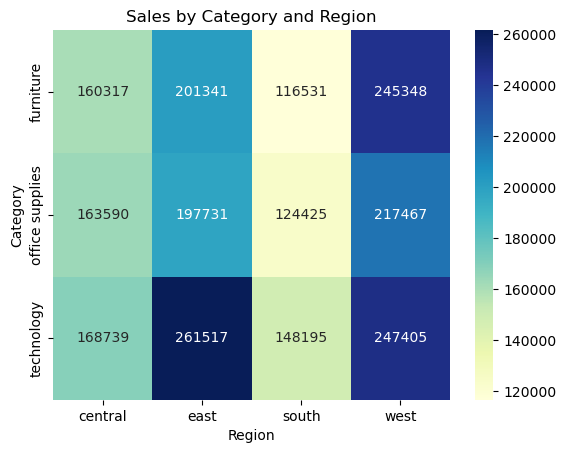

In [1358]:
#Sales by Categories 
pivot = df.pivot_table(values='Sales', index='Category', columns='Region', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Sales by Category and Region")
plt.show()


Text(0.5, 1.0, 'Sales by Category')

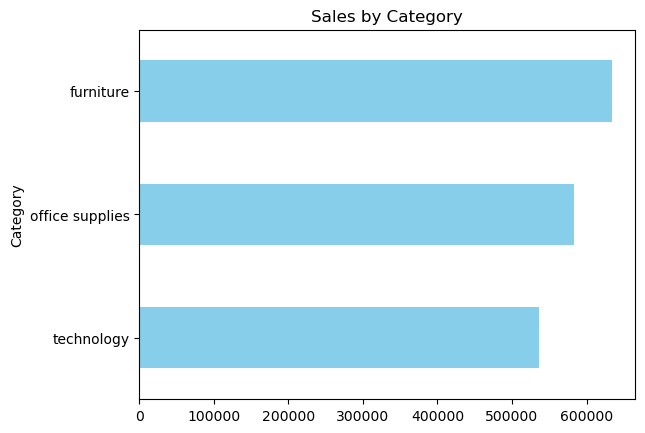

In [1359]:
sales_by_category = df_cleaned.groupby('Category')['Sales'].sum().sort_values()
sales_by_category.plot(kind='barh', color='skyblue')
plt.title('Sales by Category')

Text(0.5, 1.0, 'Sales by Sub-Category')

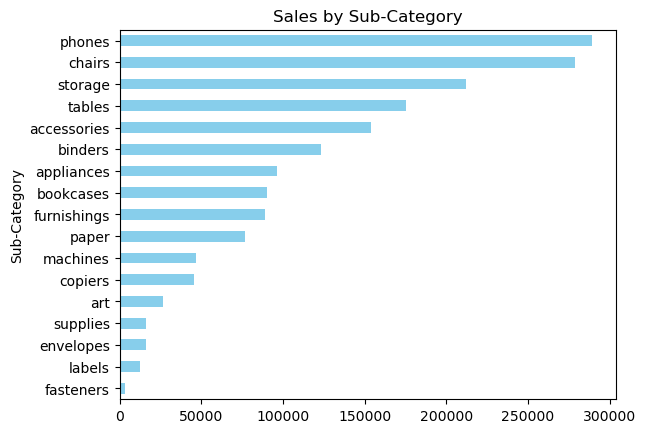

In [1360]:
# Sales by Sub category 
sales_by_sub_category = df_cleaned.groupby('Sub-Category')['Sales'].sum().sort_values()
sales_by_sub_category.plot(kind='barh', color='skyblue')
plt.title('Sales by Sub-Category')

Text(0.5, 1.0, 'Top 10 States by Sales')

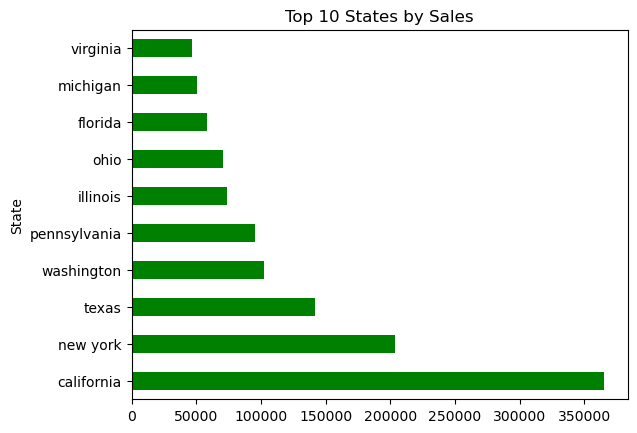

In [1361]:
# Top states by Sales 
top_states = df_cleaned.groupby('State')['Sales'].sum().nlargest(10)
top_states.plot(kind='barh', color='green')
plt.title('Top 10 States by Sales')

Text(0.5, 1.0, 'Top 10 States by Sales')

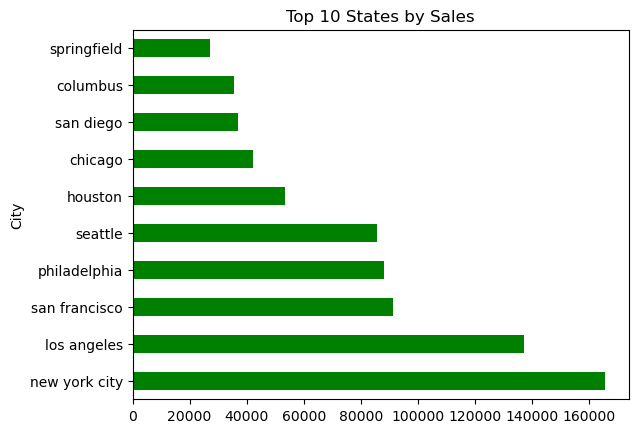

In [1362]:
# Top Cities by Sales 
top_cities = df_cleaned.groupby('City')['Sales'].sum().nlargest(10)
top_cities.plot(kind='barh', color='green')
plt.title('Top 10 States by Sales')


In [1363]:
#Line Plot to understand "Sales trend over time"
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date']) #convert 'order date to actual datetime object
df_cleaned = df_cleaned.sort_values('Order Date') # sort all date based on 'Order Date' column in ascending order
df_cleaned['Sales'] = df_cleaned['Sales'].round(2)

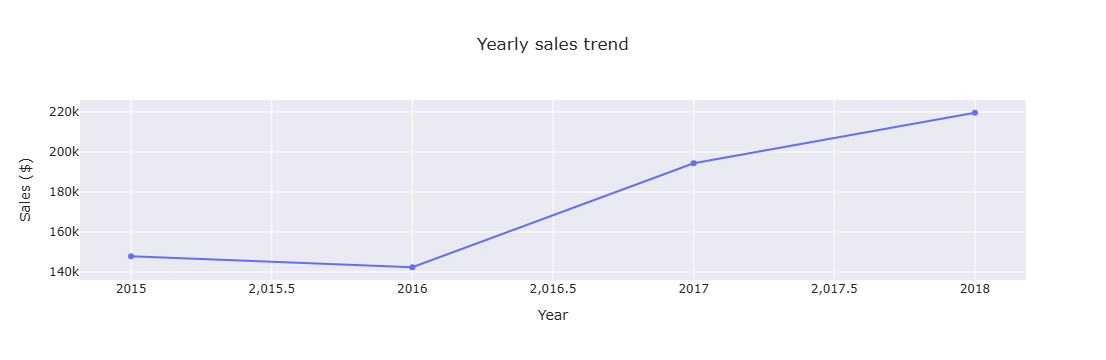

In [1364]:
#By year 
df_cleaned['year'] = df_cleaned['Order Date'].dt.year # Add a new column called 'year' by extracting year for each 'Order date'
df_yearly = df_cleaned.groupby('year')[['Sales']].sum() #group the data by year and sum up for each year

df_yearly = df_yearly.reset_index()
fig_yearly = px.line(df_yearly, x='year', y='Sales', title ='Yearly sales trend')
fig_yearly.update_traces(mode='lines+markers')
fig_yearly.update_layout(xaxis_title='Year', yaxis_title='Sales ($)', template='seaborn')

fig_yearly.show()

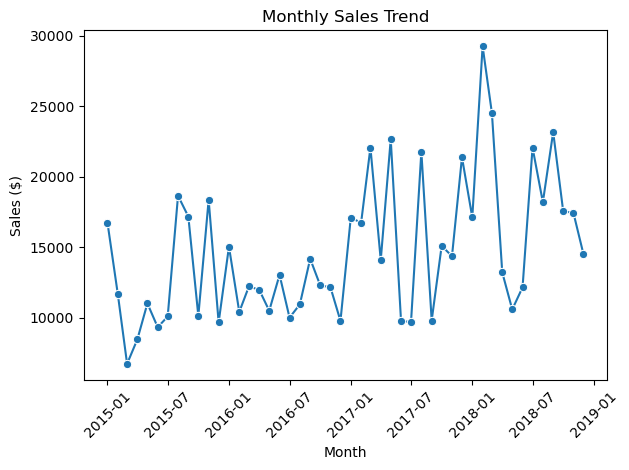

In [1365]:
#By Year -month
df_monthly = df_cleaned.groupby(df_cleaned['Order Date'].dt.to_period('M'))[['Sales']].sum().reset_index() #converts ordinary date format to Year-month format. Group all record falling in same month , then sums the numeric columns such as sales and the reset_index turns the pivot table into dataframe 
df_monthly['Order Date'] = df_monthly['Order Date'].dt.to_timestamp() # Converts the order date column in year -month ex 2023-01 back into a datetime like 2023-01-01.
df_monthly.head(2)

sns.lineplot(data = df_monthly, x= 'Order Date', y = 'Sales',marker = 'o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

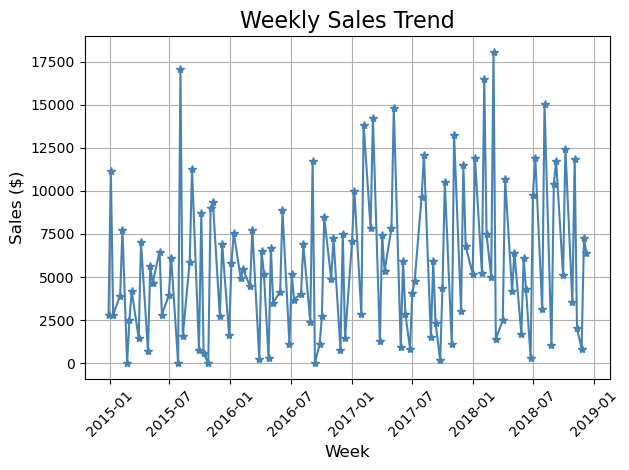

In [1366]:
#By week
df_weekly = df_cleaned.groupby(df_cleaned['Order Date'].dt.to_period('W'))[['Sales']].sum().reset_index() #converts ordinary date format to Year-month format. Group all record falling in same month , then sums the numeric columns such as sales and the reset_index turns the pivot table into dataframe 
df_weekly['Order Date'] = df_weekly['Order Date'].dt.to_timestamp() # Converts the order date column in year -month ex 2023-01 back into a datetime like 2023-01-01.
df_weekly.head(2)
plt.plot(df_weekly['Order Date'], df_weekly['Sales'], marker ='*', color = 'steelblue')
plt.title('Weekly Sales Trend', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

<h4 style="color:blue; font-size:20px;"><strong><em>DBSCAN Modeling </em></strong</em></strong></h4>

In [1368]:
#Contrary to the `KMeans` clusterer, `DBSCAN` does not take a number of clusters as argument.\
# Instead, the algorithm separates data based on areas of high and low density.\
# The parameters that determine this density are the `min_samples` and `eps` values
from sklearn.cluster import DBSCAN
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

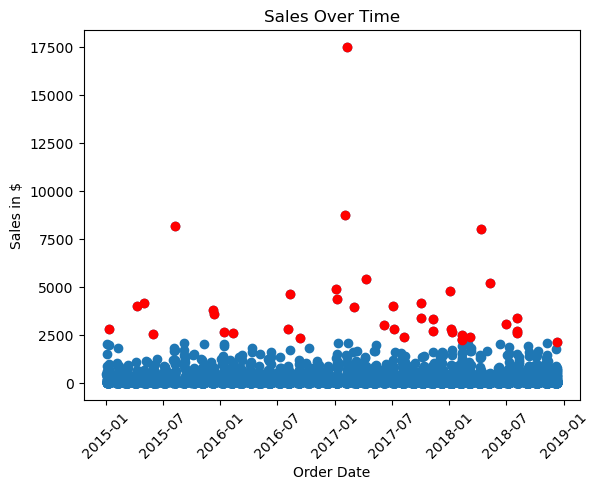

In [1369]:
#Scatter Plot
plt.scatter(df['Order Date'],df['Sales'])
plt.scatter(above_threshold['Order Date'],above_threshold['Sales'], color='red', label='Sales > 2150')
plt.xlabel('Order Date')
plt.xticks(rotation=45)
plt.ylabel('Sales in $')
plt.title('Sales Over Time')

plt.show()

<h4 style="color:blue; font-size:20px;"><strong><em>DBSCAN Modeling With Sales Data Only </em></strong</em></strong></h4>

<Figure size 1000x600 with 0 Axes>

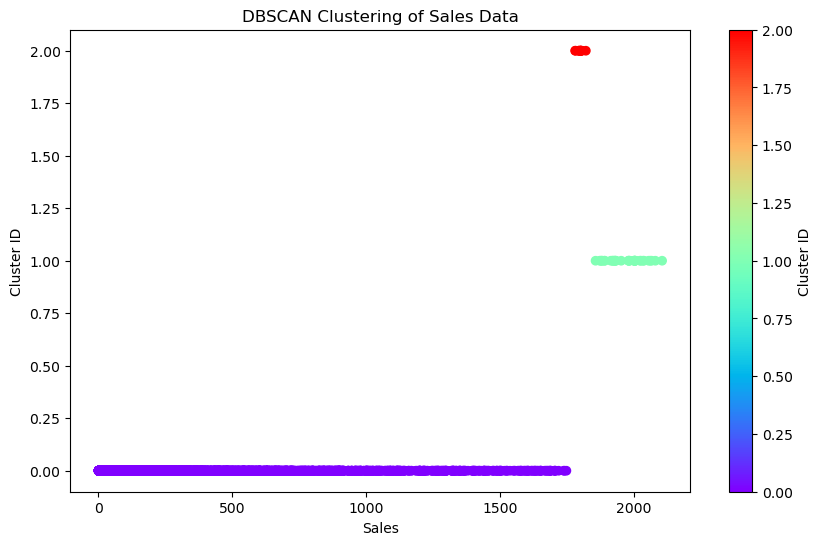

In [1371]:
# Attemp to use DBSCAN using Sales data only 
#Encode Region using One-Hot Encoding a
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

# Assuming df_cleaned is already your DataFrame with cleaned data
df_encoded = pd.get_dummies(df_cleaned, columns=['Region'])
df_encoded = df_encoded[['Sales', 'Region_central', 'Region_east', 'Region_south', 'Region_west']]

X_sales = df_encoded[['Sales']]

# Scale the features
scaler = StandardScaler()
X_scaled_sales = scaler.fit_transform(X_sales)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=4)
df_encoded['Cluster'] = dbscan.fit_predict(X_scaled_sales)

# Plot the data
plt.figure(figsize=(10,6))

# Scatter plot (note that we use df_encoded here for plotting)
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_encoded['Sales'], df_encoded['Cluster'], c=df_encoded['Cluster'], cmap='rainbow')
plt.xlabel('Sales')
plt.ylabel('Cluster ID')
plt.title('DBSCAN Clustering of Sales Data')
plt.colorbar(scatter, label='Cluster ID')
plt.show()



<h4 style="color:blue; font-size:20px;"><strong><em>DBSCAN Modeling with Sales and Region Data </em></strong</em></strong></h4>

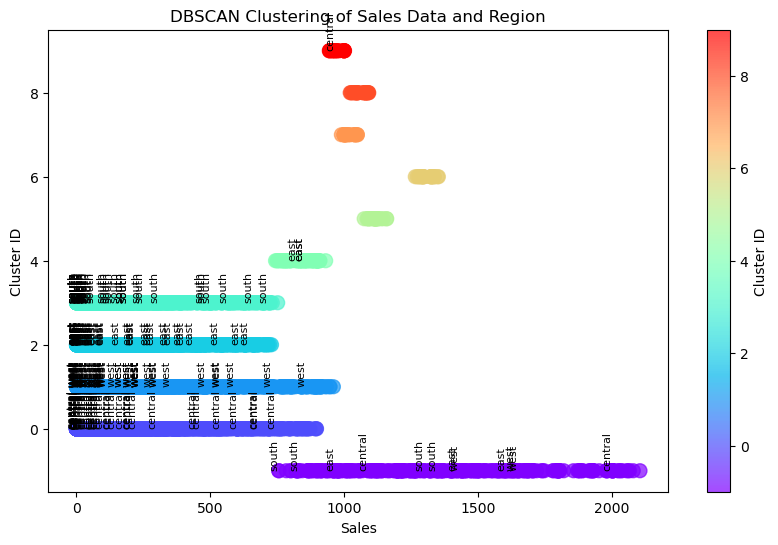

In [1373]:
# Attemp to use DBSCAN using Sales data  and Region 


# Assuming df_cleaned is your DataFrame and contains a 'Region' column
df_cleaned = df_cleaned.reset_index(drop=True)

# Initialize the LabelEncoder
le = LabelEncoder()

# 3. Encode Region (turn text into numbers)
df_cleaned['Region_encoded'] = le.fit_transform(df_cleaned['Region'])

# Select features (Sales and Region_encoded)
X = df_cleaned[['Sales', 'Region_encoded']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=15)
df_cleaned['Cluster'] = dbscan.fit_predict(X_scaled)

# Reset index in case of issues with non-contiguous indexing
df_cleaned = df_cleaned.reset_index(drop=True)

# Plot the data
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_cleaned['Sales'], df_cleaned['Cluster'], 
                      c=df_cleaned['Cluster'], cmap='rainbow', s=100, alpha=0.7)

# Add colorbar to show which cluster each color represents
plt.colorbar(scatter, label='Cluster ID')

plt.xlabel('Sales')
plt.ylabel('Cluster ID')
plt.title('DBSCAN Clustering of Sales Data and Region')

# Add region labels to the plot (with some offset to avoid overlap)
# Adjust text label positioning to reduce overlap (offset the label)
for i in range(len(df_cleaned)):
    # Only display labels for points in specific clusters or a subset of points to avoid clutter
    if i % 40 == 0:  # This condition selects only a subset of points (every 10th point)
        plt.text(df_cleaned['Sales'].iloc[i], df_cleaned['Cluster'].iloc[i], 
                 df_cleaned['Region'].iloc[i], fontsize=8, ha='right', va='bottom', 
                 color='black', fontweight='light', 
                 horizontalalignment='left', verticalalignment='top',
                 rotation=90)  # Rotate label by 90 degrees (vertical)
        
# Show the plot
plt.show()


<h4 style="color:blue; font-size:20px;"><strong><em>KMEANS Classification for Sales Data Only</em></strong</em></strong></h4>

In [1375]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [1376]:
# Reshape data
X = df_cleaned['Sales'].values.reshape(-1,1)

In [1377]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_trained_scaled = scaler.fit_transform(X_train_numeric)
# X_test_scaled = scaler.fit_transform(X_test_numeric)

In [1378]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df_cleaned['Sales_Cluster'] = kmeans.labels_


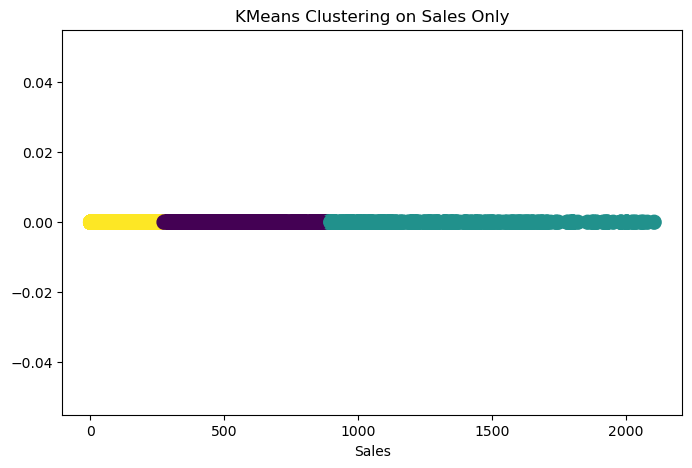

In [1379]:
plt.figure(figsize=(8,5))
plt.scatter(df_cleaned['Sales'], [0]*len(df_cleaned), c=df_cleaned['Sales_Cluster'], cmap='viridis', s=100)
plt.xlabel('Sales')
plt.title('KMeans Clustering on Sales Only')
plt.show()

<h4 style="color:blue; font-size:20px;"><strong><em>Time Series Modeling </em></strong</em></strong></h4>

In [1382]:
df_cleaned.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Year,Month,4-Month Period,Sales Bin,year,Region_encoded,Cluster,Sales_Cluster
0,541,ca2015140795,2015-01-02,2015-03-02,first class,bd11500,bradley drucker,consumer,united states,green bay,...,enermax aurora lite keyboard,468.90,2015.0,January,2015-01,"(0, 500]",2015.0,0,0,0
1,7948,ca2015131009,2015-01-03,2015-05-03,standard class,sc20380,shahid collister,consumer,united states,el paso,...,plymouth boxed rubber bands by plymouth,18.84,2015.0,January,2015-01,"(0, 500]",2015.0,0,0,2


In [1383]:
df_t = df_cleaned[['Order Date', 'Sales']]

In [1384]:
df_t.isnull().sum()

Order Date    5752
Sales            0
dtype: int64

<h4 style="color:blue; font-size:15px;"><strong><em>Dropped samples with bank dates </em></strong</em></strong></h4>

In [1386]:
df_t_cleaned = df_t.dropna(subset =['Order Date'])

<h4 style="color:blue; font-size:15px;"><strong><em>Sorted data based on Order Date and then grouped sales data based on order date  </em></strong</em></strong></h4>

In [1388]:
sales_time = df_t_cleaned.sort_values('Order Date') # sort table by date
sales_over_time = df_cleaned.groupby('Order Date')['Sales'].sum() # summ by date

In [1389]:
sales_time.head()

,Order Date,Sales
0,2015-01-02,468.90
10,2015-01-03,17.47
8,2015-01-03,634.12
7,2015-01-03,376.51
6,2015-01-03,137.35


In [1390]:
sales_over_time.head()

Order Date
2015-01-02     468.90
2015-01-03    2203.15
2015-01-04     119.89
2015-01-06    5188.52
2015-01-07     601.02
Name: Sales, dtype: float64

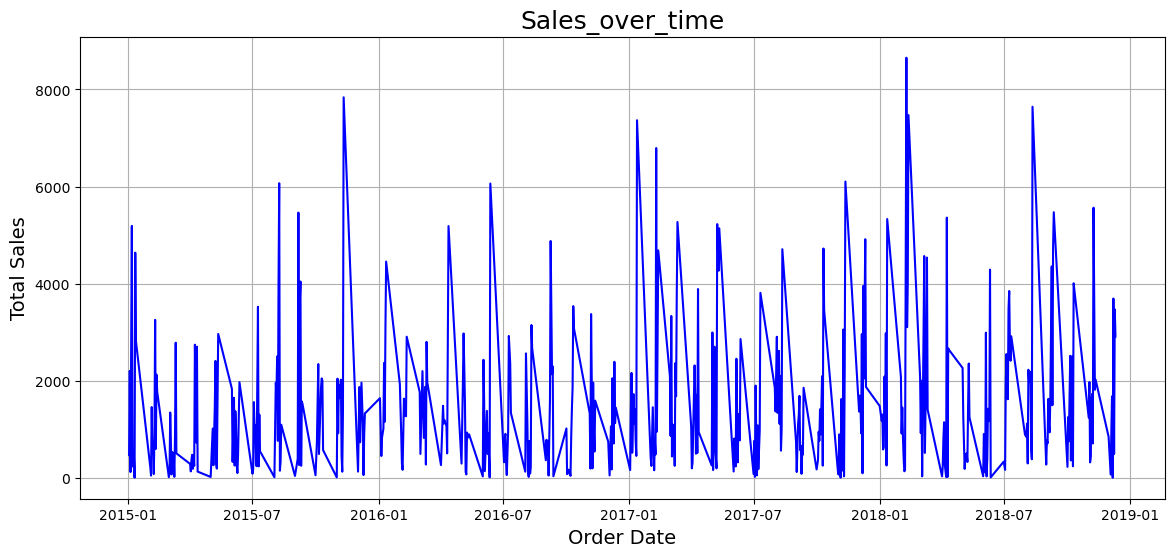

In [1391]:
plt.figure(figsize=(14,6))
plt.plot(sales_over_time.index, sales_over_time.values, color='blue')
plt.title('Sales_over_time', fontsize=18)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True)
plt.show()

<h4 style="color:blue; font-size:15px;"><strong><em>Testing for singularity required for Time Series Modeling  </em></strong</em></strong></h4>

In [1393]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test. A test for stationay 
result = adfuller(sales_over_time)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

print("Note data is stationary Since -4.70 is lower than -3.44, and p-value is < 0.05 → the series is stationar")

ADF Statistic: -4.7017129426323905
p-value: 8.35314741193615e-05
Critical Values:
   1%: -3.4444305322234365
   5%: -2.8677488864580885
   10%: -2.5700770984781443
Note data is stationary Since -4.70 is lower than -3.44, and p-value is < 0.05 → the series is stationar


In [1394]:
# reset index to Order Date (just a verfication on dtyoe for date column)
print(sales_over_time.index)
print(isinstance(sales_over_time.index, pd.DatetimeIndex))


DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-12',
               ...
               '2018-12-01', '2018-12-03', '2018-12-04', '2018-12-05',
               '2018-12-06', '2018-12-07', '2018-12-08', '2018-12-09',
               '2018-12-10', '2018-12-11'],
              dtype='datetime64[ns]', name='Order Date', length=478, freq=None)
True


<h4 style="color:blue; font-size:15px;"><strong><em>Exponential weighting to the data for smoothing or trend analysis. ensures recent points have exponentially more weight </em></strong</em></strong></h4>

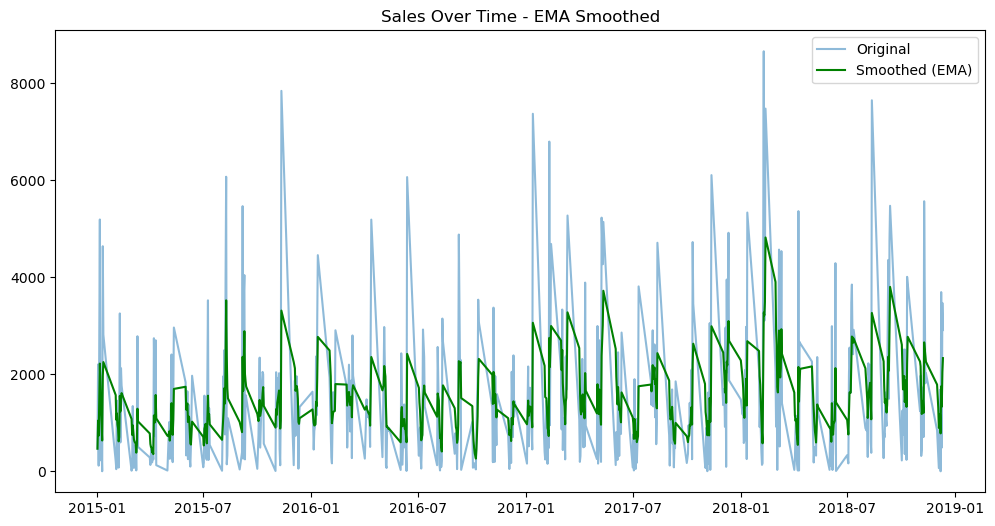

In [1396]:
# Exponential Moving Average
sales_ema = sales_over_time.ewm(span=5, adjust=False).mean()

# Plot original vs EMA
plt.figure(figsize=(12,6))
plt.plot(sales_over_time, label='Original', alpha=0.5)
plt.plot(sales_ema, label='Smoothed (EMA)', color='green')
plt.title('Sales Over Time - EMA Smoothed')
plt.legend()
plt.show()


<h4 style="color:blue; font-size:15px;"><strong><em>Split Daily historical and future data and Plot the trend </em></strong</em></strong></h4>

In [1398]:
y_hist = sales_ema.loc['2015-01':'2018-07']
y_future = sales_ema.loc['2018-08':'2019-01']

<h4 style="color:blue; font-size:15px;"><strong><em>Plot of train(hist) and test (assumed future) data </em></strong</em></strong></h4>

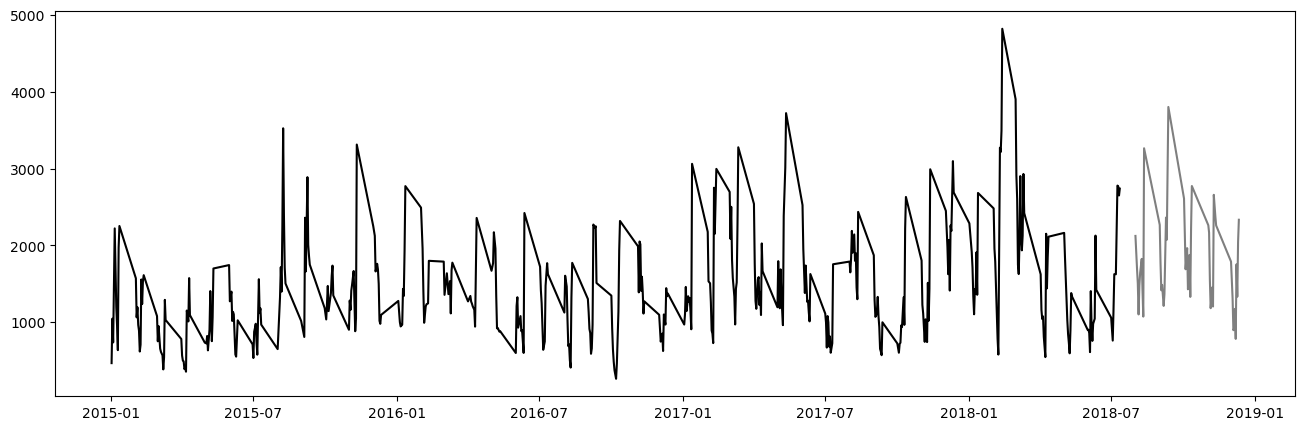

In [1400]:
plt.figure(figsize=(16,5))
plt.plot(y_hist,'k')
plt.plot(y_future,'k',alpha =0.5)

<h4 style="color:blue; font-size:15px;"><Data is not taken at regular intervals. Majority is at interval of 1 day </em></strong</em></strong></h4>

<h4 style="color:blue; font-size:15px;"><strong><em>Data at irregular intervals. Majority is at an interval of 1 day</em></strong</em></strong></h4>

In [1403]:
sales_ema.head()
print(sales_ema.index.to_series().diff().value_counts())
print(f"Start date: {sales_ema.index.min()}")
print(f"End date: {sales_ema.index.max()}")
print(f"Total duration: {sales_ema.index.max() - sales_ema.index.min()}")


Order Date
1 days     361
2 days      63
20 days     21
19 days     12
21 days      9
3 days       5
17 days      3
4 days       1
22 days      1
23 days      1
Name: count, dtype: int64
Start date: 2015-01-02 00:00:00
End date: 2018-12-11 00:00:00
Total duration: 1439 days 00:00:00


<h4 style="color:blue; font-size:15px;"><strong><em>Converting data which is pd.series type to DataFrame for modeling </em></strong</em></strong></h4>

In [1405]:
sales_ema_df = sales_ema.to_frame() # converting sales_ema to DataFrame
is_dataframe = isinstance(sales_ema_df, pd.DataFrame)
print(is_dataframe, 'Is a DataFrame')

True Is a DataFrame


<h4 style="color:blue; font-size:15px;"><strong><em>Raw dataset of order timestamps into a daily time series — ensuring no missing dates, counting how many orders happened each day, and filling in gaps with zeros. Now the data is at regular daily intervals</em></strong</em></strong></h4>

In [1407]:
#1 Group by Date (aggregate orders per day) Groups the sales_ema DataFrame by 'Order Date'and 
#Sums all numeric columns such as sales in this case for each unique date.
daily_orders = sales_ema.groupby('Order Date').sum() 

In [1408]:
# 2 Resets the index so 'Order Date' becomes a column again (not index)
daily_orders = daily_orders.reset_index()

In [1409]:
#3 Each row is assumed to represent a single order — so this lets you count how many orders occurred per day by summing this column.
sales_ema_df['Order Count'] = 1

In [1410]:
#4 Group by 'Order Date' and sum the 'Order Count'. Groups the updated sales_ema_df by 'Order Date'.
#5 Sums the 'Order Count', which counts how many orders happened on each date.
#6 Resets the index so you get a clean DataFrame with columns
daily_orders = sales_ema_df.groupby('Order Date')['Order Count'].sum().reset_index()

In [1411]:
#7 Creates a complete range of dates from the earliest to the latest order date. 
#Even if some dates are missing from daily_orders, this range will fill the gaps.
full_range = pd.date_range(start=daily_orders['Order Date'].min(),
                           end=daily_orders['Order Date'].max())
#8 Sets 'Order Date' as the DataFrame index.
#Then reindexes it using the full date range (full_range), so all dates are included — even if no orders happened on some of them.
# 9 Reindex with full date range
daily_orders = daily_orders.set_index('Order Date').reindex(full_range)

# 10 Fills in all NaN values (i.e., days with no orders) with 0.
#This gives a complete daily time series — no missing dates, and zero for days with no activity.
daily_orders.index.name = 'Order Date'
daily_orders['Order Count'] = daily_orders['Order Count'].fillna(0)

In [1412]:
daily_orders = daily_orders.reset_index()
daily_orders

,Order Date,Order Count
0,2015-01-02,1.0
1,2015-01-03,1.0
2,2015-01-04,1.0
3,2015-01-05,0.0
4,2015-01-06,1.0
...,...,...
1435,2018-12-07,1.0
1436,2018-12-08,1.0
1437,2018-12-09,1.0
1438,2018-12-10,1.0


In [1413]:
# Checking the differences between consecutive dates
print(daily_orders['Order Date'].diff().value_counts())

# Get the start and end dates, and calculate the total duration
print(f"Start date: {daily_orders['Order Date'].min()}")
print(f"End date: {daily_orders['Order Date'].max()}")
print(f"Total duration: {daily_orders['Order Date'].max() - daily_orders['Order Date'].min()}")

# Display the first 100 rows
daily_orders.head(100)


Order Date
1 days    1439
Name: count, dtype: int64
Start date: 2015-01-02 00:00:00
End date: 2018-12-11 00:00:00
Total duration: 1439 days 00:00:00


,Order Date,Order Count
0,2015-01-02,1.0
1,2015-01-03,1.0
2,2015-01-04,1.0
3,2015-01-05,0.0
4,2015-01-06,1.0
...,...,...
95,2015-04-07,1.0
96,2015-04-08,1.0
97,2015-04-09,0.0
98,2015-04-10,1.0


In [1414]:
y_hist = daily_orders.loc['2015-01':'2018-07']
y_future = daily_orders.loc['2018-08':'2019-01']
isinstance(daily_orders, pd.DataFrame)

True

In [1415]:
print(daily_orders.columns)
print(daily_orders.index)

Index(['Order Date', 'Order Count'], dtype='object')
RangeIndex(start=0, stop=1440, step=1)


In [1416]:
# reset the index first
if 'Order Date' not in daily_orders.columns:
    daily_orders = daily_orders.reset_index()

# Ensure it's datetime
daily_orders['Order Date'] = pd.to_datetime(daily_orders['Order Date'])

# Now set it as the index
daily_orders = daily_orders.set_index('Order Date')

# Create a numeric feature: days since start
daily_orders['Days Since Start'] = (daily_orders.index - daily_orders.index.min()).days
daily_orders

,Order Count,Days Since Start
Order Date,,
2015-01-02,1.0,0
2015-01-03,1.0,1
2015-01-04,1.0,2
2015-01-05,0.0,3
2015-01-06,1.0,4
...,...,...
2018-12-07,1.0,1435
2018-12-08,1.0,1436
2018-12-09,1.0,1437


<h4 style="color:blue; font-size:15px;"><strong><em>Demonstration Purpose only. Daily Orders Since I had to drop many samples due to "no dates" and select only daily order to make data regular, the data got reduced to daily orders on one sale only </em></strong</em></strong></h4>

In [1418]:
# Convert the date index to a numeric feature (e.g., days since start)
daily_orders['Days Since Start'] = (daily_orders.index - daily_orders.index.min()).days
X = daily_orders[['Days Since Start']]       # Feature
y = daily_orders['Order Count']              # Target


In [1419]:
# Use 80% for training, 20% for testing. use of slicing to preserve time order
split_idx = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


In [1420]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [1421]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 0.4509761015479817
Root Mean Squared Error: 0.4817908496485291


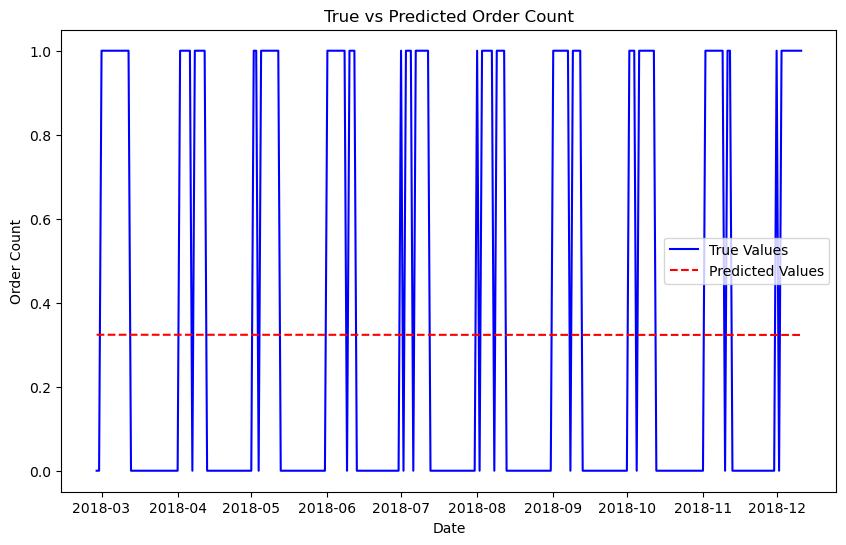

In [1422]:
import matplotlib.pyplot as plt

# Plot true vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='True Values', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.title('True vs Predicted Order Count')
plt.legend()
plt.show()


<h4 style="color:blue; font-size:15px;"><strong><em>Demonstration Purpose only. Weekly Orders (Logistic Regression) Since I had to drop many samples due to "no dates" and select only daily order to make data regular, the data got reduced to daily orders on one sale only </em></strong</em></strong></h4>

In [1443]:
# Weekly analysis using Logistic Regression with a threshold of 6 
weekly_orders = daily_orders.resample('W').sum()  # Sum order counts weekly
weekly_orders['Weeks Since Start'] = (weekly_orders.index - weekly_orders.index.min()).days // 7
X = weekly_orders[['Weeks Since Start']]  # Feature
y = weekly_orders['Order Count']          # Target
#Predict if weekly orders exceed a threshold
threshold = 6
y = (weekly_orders['Order Count'] > threshold).astype(int)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9523809523809523


In [1445]:
weekly_orders.describe()

,Order Count,Days Since Start,Weeks Since Start
count,207.000000,207.000000,207.000000
mean,2.309179,5005.217391,103.000000
std,2.409742,2917.557674,59.899917
min,0.000000,3.000000,0.000000
25%,0.000000,2516.500000,51.500000
50%,2.000000,4991.000000,103.000000
75%,5.000000,7514.500000,154.500000
max,7.000000,10038.000000,206.000000


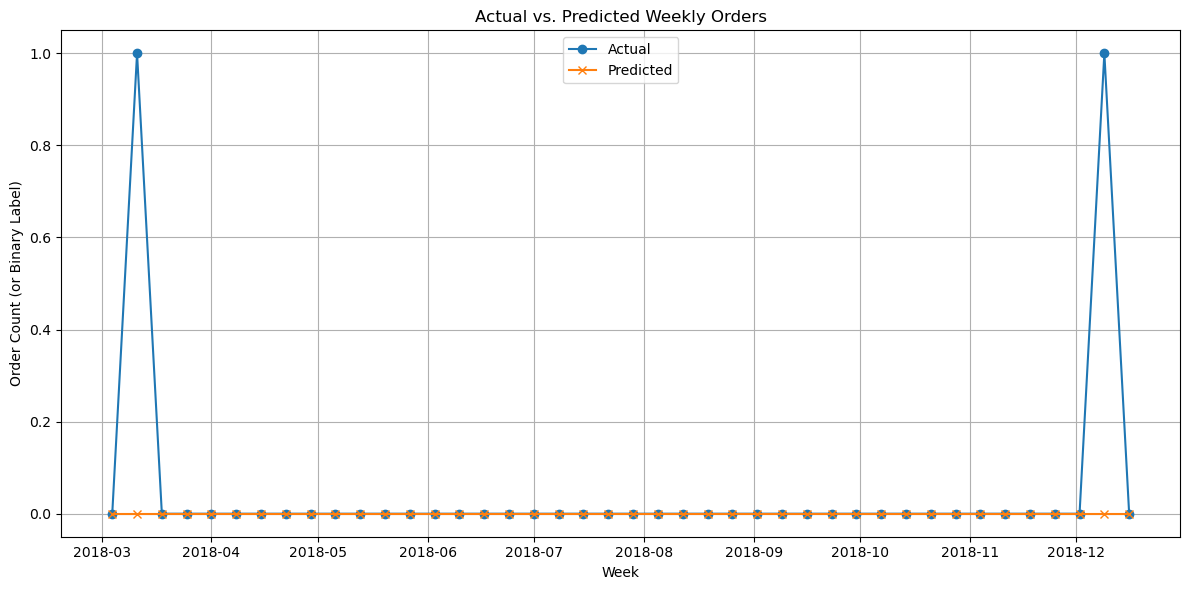

In [1447]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(X_test.index, y_test, label='Actual', marker='o')

# Plot predicted values
plt.plot(X_test.index, y_pred, label='Predicted', marker='x')

# Customize the plot
plt.xlabel('Week')
plt.ylabel('Order Count (or Binary Label)')
plt.title('Actual vs. Predicted Weekly Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [1435]:
# Predict & evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9523809523809523


End for now. More to come